#Importing required libraries

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Since there are two different sheets of Data, therefore segregating both of them seperately using pandas read function directly into two different DataFrames

In [3]:
Attempt_df=pd.read_excel('Data Analyst Assignement Acadally.xlsx', sheet_name='Attempts Data')
Chapter_df=pd.read_excel('Data Analyst Assignement Acadally.xlsx', sheet_name='Chapter Data')

Initially we will have to go through the size and features of data so that we can check how much cleaning or pre-processing we have to do

In [5]:
Attempt_df.shape

(1457, 12)

In [6]:
Chapter_df.shape

(6917, 4)

In [7]:
print(Attempt_df.columns)
print(Chapter_df.columns)

Index(['school_id', 'user_id', 'section_id', 'chapter_id', 'topic_id',
       'quiz_type', 'qid', 'question_status', 'learning_unit_id',
       'Bloom taxonomy', 'date', 'time'],
      dtype='object')
Index(['section_id', 'chapter', 'start_time', 'end_time'], dtype='object')


In [8]:
Attempt_df.dtypes

,0
school_id,int64
user_id,int64
section_id,int64
chapter_id,int64
topic_id,int64
quiz_type,object
qid,int64
question_status,object
learning_unit_id,object
Bloom taxonomy,object


In [9]:
Attempt_df['time'].sample(5)

,time
808,12:38:49.890000
323,14:47:15.417000
514,14:57:31.432000
664,15:01:54.746000
968,15:09:48.669000


In [10]:
Attempt_df.isnull().sum()

,0
school_id,0
user_id,0
section_id,0
chapter_id,0
topic_id,0
quiz_type,0
qid,0
question_status,0
learning_unit_id,0
Bloom taxonomy,0




```
No Nulls in this section, we can move to check duplicates which I think are likely to be present as lot of IDs are same in rows and then we will see how to handle them
```



In [11]:
Attempt_df.duplicated().sum()

np.int64(51)

In [12]:
Attempt_df[Attempt_df.duplicated()].tail(10)

,school_id,user_id,section_id,chapter_id,topic_id,quiz_type,qid,question_status,learning_unit_id,Bloom taxonomy,date,time
1447,1096,120683,2630,22051,22057,PE,16771,correct,LU000977,understand,2024-11-03,10:06:22.642000
1448,1096,120683,2630,22051,22057,PE,16775,correct,LU000978,remember,2024-11-03,10:06:22.642000
1449,1096,120683,2630,22051,22057,PE,16826,correct,LU000977,apply,2024-11-03,10:06:22.642000
1450,1096,120683,2630,22051,22057,PE,16834,wrong,LU000978,apply,2024-11-03,10:06:22.642000
1451,1096,120683,2630,22051,22057,PE,16772,wrong,LU000977,analyse,2024-11-03,10:06:22.642000
1452,1096,120620,2628,22078,22080,PE,20074,correct,LU000516,understand,2024-11-03,12:54:54.474000
1453,1096,120620,2628,22078,22080,PE,20206,correct,LU000938,understand,2024-11-03,12:54:54.474000
1454,1096,120620,2628,22078,22080,PE,7137,correct,LU000936,understand,2024-11-03,12:54:54.474000
1455,1096,120620,2628,22078,22080,PE,20225,correct,LU000937,understand,2024-11-03,12:54:54.474000
1456,1096,120620,2628,22078,22080,PE,3006,wrong,LU000516,apply,2024-11-03,12:54:54.474000


multiple columns have repeated values might show same school, syllabus or chapter, topic, section and quiz type but have variable qid, question_status still need to find completely duplicated rows to see if there are any to eliminate

In [13]:
Attempt_df.duplicated(keep=False).sum()

np.int64(102)

In [14]:
Attempt_df[Attempt_df.duplicated(keep=False)].sort_values(['user_id', 'qid', 'time']).head(10)

,school_id,user_id,section_id,chapter_id,topic_id,quiz_type,qid,question_status,learning_unit_id,Bloom taxonomy,date,time
1378,1078,116852,2012,22317,22321,PE,7631,wrong,LU005962,understand,2024-11-03,05:31:27.355000
1429,1078,116852,2012,22317,22321,PE,7631,wrong,LU005962,understand,2024-11-03,05:31:27.355000
1377,1078,116852,2012,22317,22321,PE,7633,wrong,LU005423,remember,2024-11-03,05:31:27.355000
1428,1078,116852,2012,22317,22321,PE,7633,wrong,LU005423,remember,2024-11-03,05:31:27.355000
1381,1078,116852,2012,22317,22321,PE,7634,correct,LU005423,apply,2024-11-03,05:31:27.355000
1432,1078,116852,2012,22317,22321,PE,7634,correct,LU005423,apply,2024-11-03,05:31:27.355000
1379,1078,116852,2012,22317,22321,PE,19063,wrong,LU005423,understand,2024-11-03,05:31:27.355000
1430,1078,116852,2012,22317,22321,PE,19063,wrong,LU005423,understand,2024-11-03,05:31:27.355000
1380,1078,116852,2012,22317,22321,PE,19327,wrong,LU005962,apply,2024-11-03,05:31:27.355000
1431,1078,116852,2012,22317,22321,PE,19327,wrong,LU005962,apply,2024-11-03,05:31:27.355000


Time is also same and might be duplicate entries which are supposed to be clean as complete row is duplicate

In [15]:
Attempt_df.groupby(['user_id', 'qid', 'time']).size().sort_values(ascending=False).head()

user_id  qid    time           
121166   16087  15:16:57.377000    2
         16108  15:16:57.377000    2
         16151  15:16:57.377000    2
120620   3006   12:54:54.474000    2
         7137   12:54:54.474000    2
dtype: int64

In [16]:
Attempt_df = Attempt_df.drop_duplicates(subset=['user_id', 'qid', 'time'], keep='first')

In [17]:
Attempt_df.groupby(['user_id', 'qid', 'time']).size().sort_values(ascending=False).head()

user_id  qid    time           
136359   17364  16:23:43.391000    1
116597   6      15:08:09.562000    1
         10     15:07:43.349000    1
         25     15:07:43.349000    1
         32     15:07:43.349000    1
dtype: int64

In [18]:
Attempt_df.duplicated().sum()

np.int64(0)

Next, lets move to Chapter section

In [19]:
print(Chapter_df.dtypes)
print('Null values:', Chapter_df.isnull().sum())
print('Duplicate Values:', Chapter_df.duplicated().sum())

section_id             int64
chapter                int64
start_time    datetime64[ns]
end_time      datetime64[ns]
dtype: object
Null values: section_id      0
chapter         0
start_time      0
end_time      743
dtype: int64
Duplicate Values: 0


In [20]:
Chapter_df.head()

,section_id,chapter,start_time,end_time
0,1981,16737,2025-01-17 07:48:35,2025-01-28 07:49:18
1,2777,14641,2025-01-11 09:07:42,2025-01-28 04:51:44
2,2776,14641,2025-01-13 12:40:31,2025-01-28 04:51:21
3,2120,7595,2025-01-27 19:06:07,2025-01-27 22:04:11
4,3134,25300,2025-01-05 18:23:18,2025-01-27 21:39:46


In [21]:
Chapter_df[Chapter_df['end_time'].isnull()]

,section_id,chapter,start_time,end_time
6174,1863,4517,2024-04-25 23:28:46,NaT
6175,2375,4027,2024-06-14 12:39:43,NaT
6176,2373,4021,2024-06-15 10:27:07,NaT
6177,2370,3994,2024-06-15 11:58:24,NaT
6178,2372,3994,2024-06-15 11:59:58,NaT
...,...,...,...,...
6912,3382,13726,2024-12-25 08:05:41,NaT
6913,3396,13726,2024-12-25 08:06:03,NaT
6914,3773,17004,2024-12-26 11:18:27,NaT
6915,3385,13966,2024-12-27 06:42:11,NaT


In [22]:
Chapter_df=Chapter_df.dropna(subset=['end_time'])

In [23]:
Chapter_df.isnull().sum()

,0
section_id,0
chapter,0
start_time,0
end_time,0


In [24]:
Chapter_df.shape

(6174, 4)

Almost 10% of the rows I have dropped because of nulls, as column wise there might be several duplicate sections so it won't affect the distinct chapter, section ID or start time.
I wasn't sure with what to put in place of nulls because end time parameter is too much variable and related with start time, chapter

In [25]:
Chapter_df.groupby(['section_id']).head()

,section_id,chapter,start_time,end_time
0,1981,16737,2025-01-17 07:48:35,2025-01-28 07:49:18
1,2777,14641,2025-01-11 09:07:42,2025-01-28 04:51:44
2,2776,14641,2025-01-13 12:40:31,2025-01-28 04:51:21
3,2120,7595,2025-01-27 19:06:07,2025-01-27 22:04:11
4,3134,25300,2025-01-05 18:23:18,2025-01-27 21:39:46
...,...,...,...,...
6076,2143,2587,2024-04-09 15:39:05,2024-04-26 14:42:12
6077,2146,2614,2024-04-22 20:50:25,2024-04-26 14:41:48
6078,2144,2595,2024-04-22 20:49:53,2024-04-26 14:41:21
6134,1863,1628,2024-04-08 08:49:05,2024-04-19 08:59:02


Data is free from nulls and completely duplicated rows.
There might be need of Time comparison analysis so will do later the formatting when it will be needed



#What are the primary key(s) of the given tables (post cleaning)

In [30]:
Chapter_df['section_id'].nunique(), Chapter_df.shape[0]

(833, 6174)

In [27]:
Chapter_df[['section_id','chapter']].duplicated().sum()

np.int64(0)

In [28]:
Chapter_df.duplicated(subset=['section_id', 'chapter']).sum()

np.int64(0)

In [29]:
Attempt_df['qid'].duplicated().sum()

np.int64(402)

We removed duplicates using Attempt_df:['user_id', 'qid', 'time'] and it left no duplicates in combined so for Attempt_df or <b>Attempt data</b> we should use Composite Primary key for these 3 columns  
and for <b>Chapter data</b> we need to use combinations of ['section_id', 'chapter'] or we can add start time as well but since we already have all rows unique when we are using these columns both in combinations so there will be no need.

#Identify top 5 sections where accuracy percentage is high?

For acurracy we would need to calculate how many correct answers has been given out of total according to each section_id.

In [71]:
# correct answers
correct_counts = Attempt_df[Attempt_df["question_status"] == "correct"].groupby("section_id").size()

# wrong answers
wrong_counts = Attempt_df[Attempt_df["question_status"] == "wrong"].groupby("section_id").size()

df = pd.DataFrame({"correct": correct_counts,"wrong": wrong_counts}).fillna(0).reset_index()
df["total_attempts"] = df["correct"] + df["wrong"]

In [72]:
df['accuracy_percent']=df['correct']/df['total_attempts']

In [73]:
df

,section_id,correct,wrong,total_attempts,accuracy_percent
0,1981,6.0,0.0,6.0,1.000000
1,1982,4.0,2.0,6.0,0.666667
2,1984,33.0,57.0,90.0,0.366667
3,1985,5.0,1.0,6.0,0.833333
4,2008,21.0,15.0,36.0,0.583333
...,...,...,...,...,...
88,3728,4.0,2.0,6.0,0.666667
89,3762,3.0,3.0,6.0,0.500000
90,3785,2.0,4.0,6.0,0.333333
91,3810,10.0,2.0,12.0,0.833333


In [76]:
Top_5_sections=df.sort_values(by='accuracy_percent', ascending=False).head(5)
print(Top_5_sections)

    section_id  correct  wrong  total_attempts  accuracy_percent
0         1981      6.0    0.0             6.0               1.0
6         2011      6.0    0.0             6.0               1.0
28        2626      6.0    0.0             6.0               1.0
54        2851      6.0    0.0             6.0               1.0
41        2683      6.0    0.0             6.0               1.0


Based on Accuracy above are the 5 sections

#Identify bottom 2 learning units with low accuracy percentage in application level questions?

In [82]:
# correct answers
correct_counts = Attempt_df[(Attempt_df["question_status"] == "correct") & (Attempt_df["Bloom taxonomy"] == "apply")].groupby("learning_unit_id").size()

# wrong answers
wrong_counts = Attempt_df[(Attempt_df["question_status"] == "wrong") & (Attempt_df["Bloom taxonomy"] == "apply")].groupby("learning_unit_id").size()

application_df = pd.DataFrame({"correct": correct_counts,"wrong": wrong_counts}).fillna(0).reset_index()
application_df["total_attempts"] = application_df["correct"] + application_df["wrong"]
application_df['accuracy_percent']=application_df['correct']/application_df['total_attempts']
print(application_df)

    learning_unit_id  correct  wrong  total_attempts  accuracy_percent
0           LU000068      0.0    1.0             1.0               0.0
1           LU000153      0.0    2.0             2.0               0.0
2           LU000154      0.0    1.0             1.0               0.0
3           LU000155      0.0    1.0             1.0               0.0
4           LU000156      1.0    1.0             2.0               0.5
..               ...      ...    ...             ...               ...
277         LU005955      2.0    0.0             2.0               1.0
278         LU005957      1.0    0.0             1.0               1.0
279         LU005960      1.0    0.0             1.0               1.0
280         LU005962      0.0    3.0             3.0               0.0
281         LU005968      1.0    0.0             1.0               1.0

[282 rows x 5 columns]


In [83]:
Bottom_2_learning_units=application_df.sort_values(by='accuracy_percent', ascending=True).head(2)
print(Bottom_2_learning_units)

  learning_unit_id  correct  wrong  total_attempts  accuracy_percent
0         LU000068      0.0    1.0             1.0               0.0
1         LU000153      0.0    2.0             2.0               0.0


Bottom two learning units in application level questions

#What percentage of questions are attempted before chapter was ended?

In [85]:
Merged_df=pd.merge(Attempt_df, Chapter_df, on= 'section_id')

In [90]:
Merged_df.head(2)

,school_id,user_id,section_id,chapter_id,topic_id,quiz_type,qid,question_status,learning_unit_id,Bloom taxonomy,date,time,chapter,start_time,end_time
0,1124,132591,3677,16228,16229,PE,13865,correct,LU005214,apply,2024-10-03,14:36:54.975000,16251,2024-12-10 14:12:52,2025-01-13 09:52:01
1,1124,132591,3677,16228,16229,PE,13865,correct,LU005214,apply,2024-10-03,14:36:54.975000,16238,2024-11-10 22:39:04,2024-12-10 14:11:55


In [88]:
Attempt_df["datetime"] = pd.to_datetime(Attempt_df["date"].astype(str) + " " + Attempt_df["time"].astype(str))

In [89]:
Attempt_df.head(2)

,school_id,user_id,section_id,chapter_id,topic_id,quiz_type,qid,question_status,learning_unit_id,Bloom taxonomy,date,time,datetime
0,1124,132591,3677,16228,16229,PE,13865,correct,LU005214,apply,2024-10-03,14:36:54.975000,2024-10-03 14:36:54.975
1,1124,132591,3677,16228,16229,PE,560,correct,LU005214,apply,2024-10-03,14:36:54.975000,2024-10-03 14:36:54.975


In [95]:
merged_df=pd.merge(Attempt_df, Chapter_df, on= 'section_id')

In [96]:
merged_df.head(2)

,school_id,user_id,section_id,chapter_id,topic_id,quiz_type,qid,question_status,learning_unit_id,Bloom taxonomy,date,time,datetime,chapter,start_time,end_time
0,1124,132591,3677,16228,16229,PE,13865,correct,LU005214,apply,2024-10-03,14:36:54.975000,2024-10-03 14:36:54.975,16251,2024-12-10 14:12:52,2025-01-13 09:52:01
1,1124,132591,3677,16228,16229,PE,13865,correct,LU005214,apply,2024-10-03,14:36:54.975000,2024-10-03 14:36:54.975,16238,2024-11-10 22:39:04,2024-12-10 14:11:55


In [97]:
attempts_before_end = merged_df[merged_df["datetime"] < pd.to_datetime(merged_df["end_time"])]

In [98]:
total_attempts = len(merged_df)
attempts_before = len(attempts_before_end)

In [103]:
percentage_before_end = (attempts_before / total_attempts)*100

In [104]:
print(f"Percentage of questions attempted before chapter was ended: {percentage_before_end:.2f}%")

Percentage of questions attempted before chapter was ended: 41.27%


#Visualize how the attempt behaviour is spread across time of the day?

<ipython-input-109-bba8170f9c28>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Attempt_df["hour"] = pd.to_datetime(Attempt_df["time"].astype(str)).dt.hour


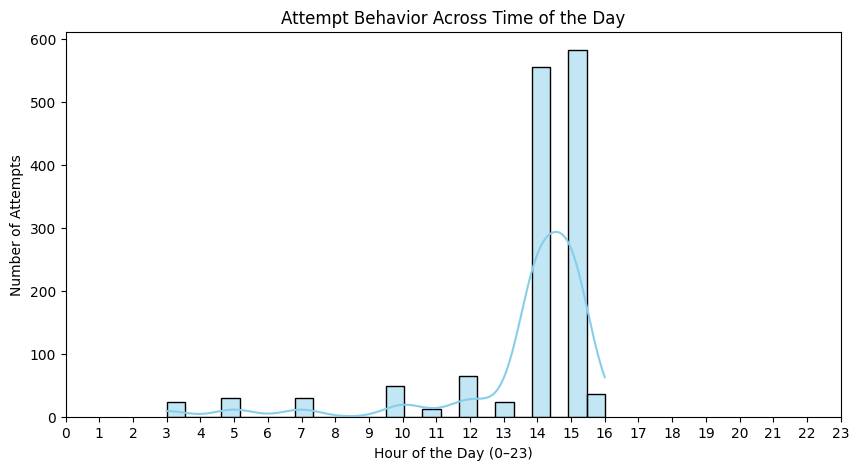

In [109]:
Attempt_df["hour"] = pd.to_datetime(Attempt_df["time"].astype(str)).dt.hour

plt.figure(figsize=(10, 5))
sns.histplot(Attempt_df["hour"], bins=24, kde=True, color="skyblue", edgecolor="black")
plt.title("Attempt Behavior Across Time of the Day")
plt.xlabel("Hour of the Day (0–23)")
plt.ylabel("Number of Attempts")
plt.xticks(range(0, 24))
plt.show()

#Share insights based on your analysis?

<b>Attempt Timing Behavior</b>
Most attempts are clustered during 14th and 15th hours of the day.
Histogram showed a peak around afternoon, it suggests users are most active during or after school hours.

<b>Accuracy by Section</b>
Calculated accuracy % for each section.
The top 5 sections have significantly higher accuracy, but that analysis only revealed students attempting less questions with 100% accuracy

* Otherwise insights might suggest:
Easier question sets
Stronger student understanding in those sections
Lower-performing sections could indicate areas that need review or teaching reinforcement.

<b>Accuracy by Learning Unit (Application-Level)</b>
The bottom 2 learning units had the lowest accuracy, signaling:
Possible confusion in applying concepts practically
Need for revision sessions or support materials on those specific units

<b>Attempts Before Chapter Ended</b> Around 41 percentage here means below average number of students are attempting questions on time — aligned with the learning schedule. Therefore, demands more practice sessions targeting attempt time, so that students may cope up with chapters completion time.
